In [154]:

import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
%matplotlib inline


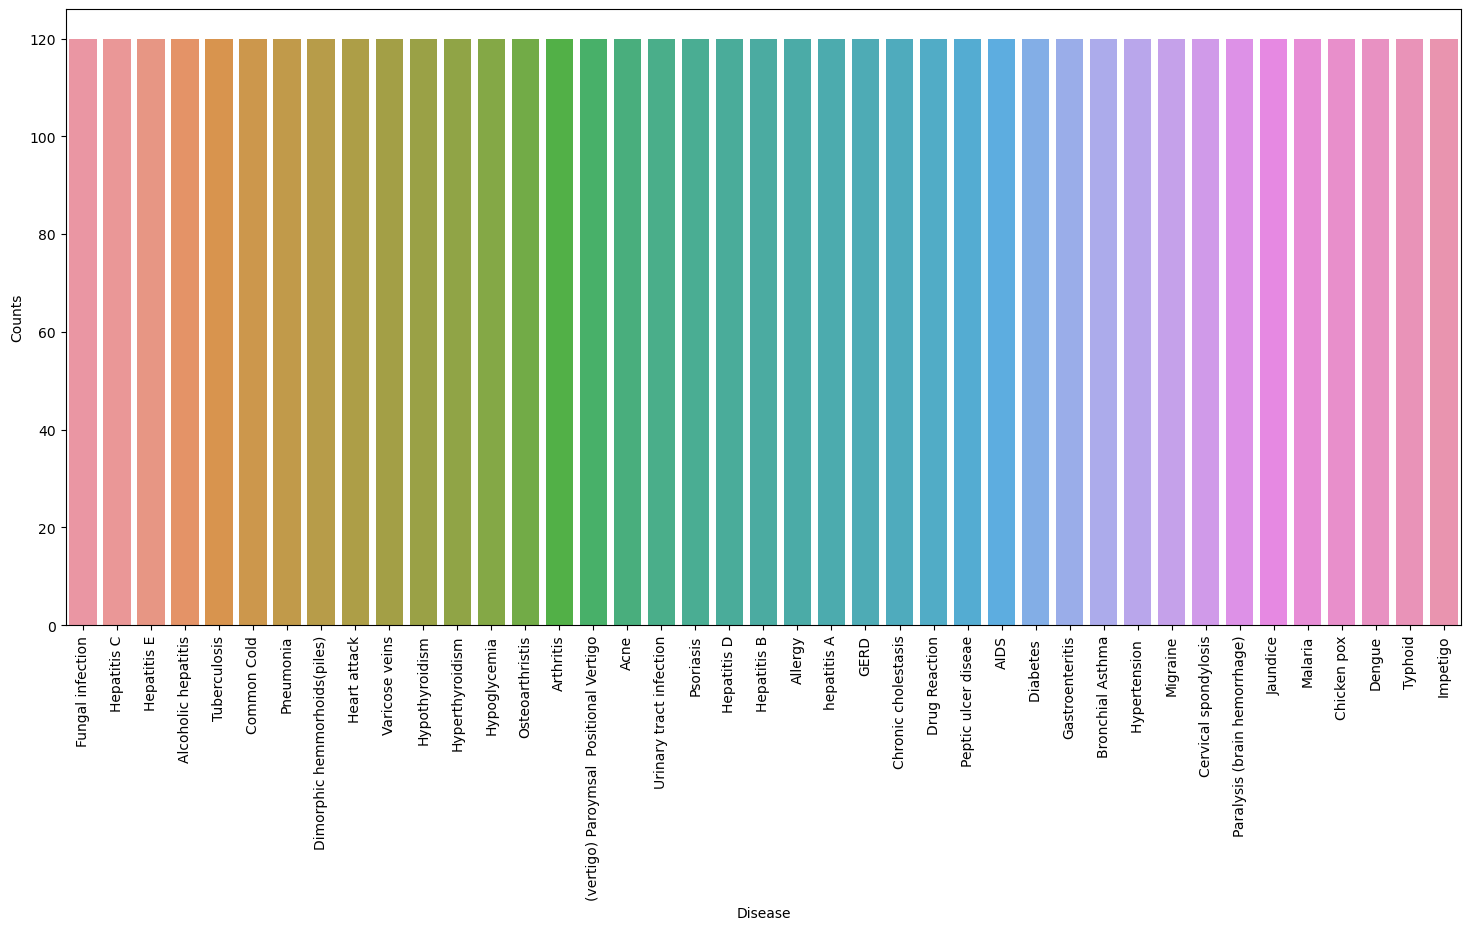

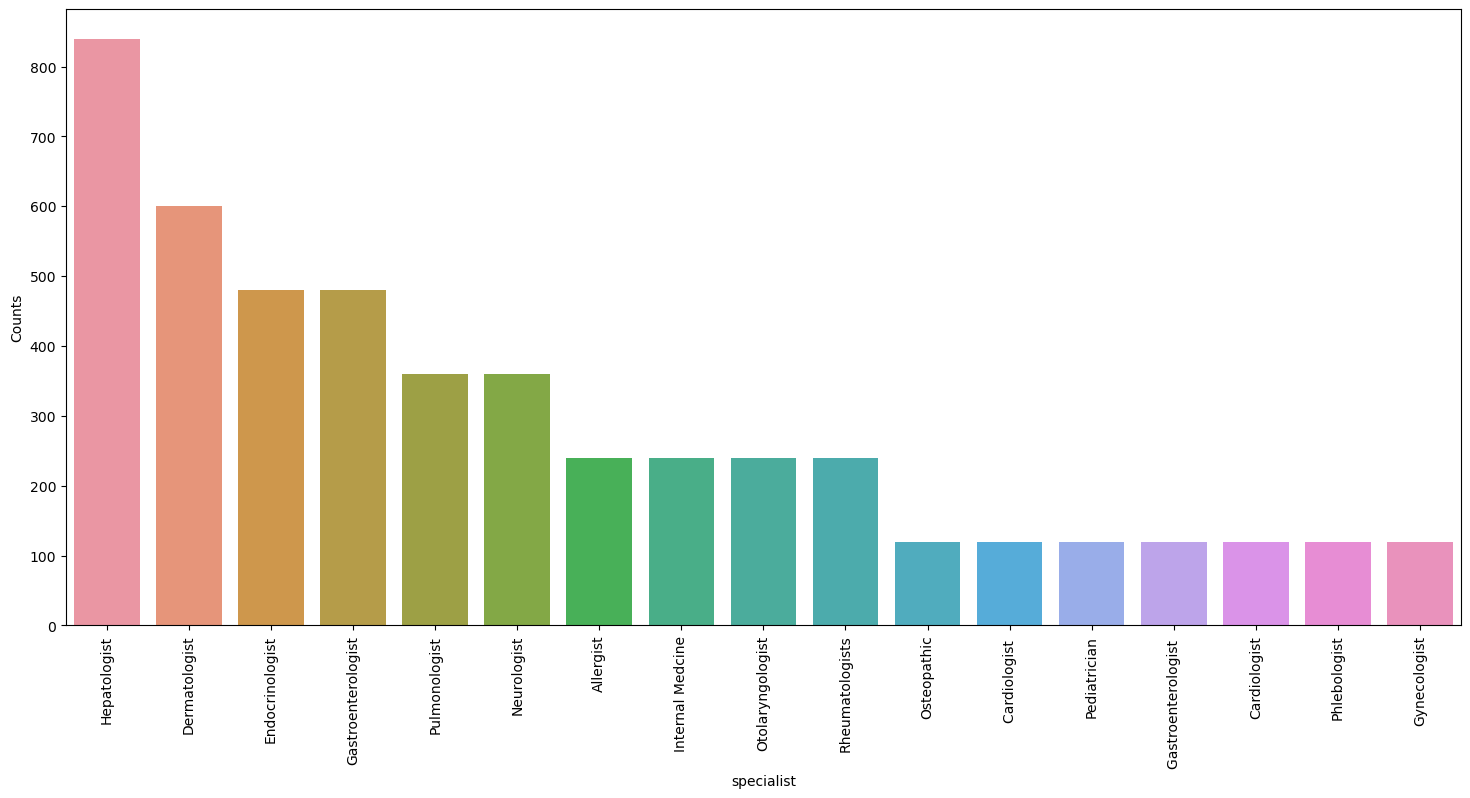

In [155]:

DATA_PATH = "C:/Users/saeed/OneDrive/Desktop/ads/AIES/Training.csv"
data = pd.read_csv(DATA_PATH, encoding='latin1').dropna(axis = 1)


disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
	"Disease": disease_counts.index,
	"Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

specialist_counts = data["specialist"].value_counts()
temp_df = pd.DataFrame({
	"specialist": specialist_counts.index,
	"Counts": specialist_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "specialist", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()


In [156]:
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"].astype(str))

data = data.drop(['specialist'], axis=1)

In [157]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test =train_test_split(
X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [158]:

def cv_scoring(estimator, X, y):
	return accuracy_score(y, estimator.predict(X))


models = {
	"SVC":SVC(),
	"Gaussian NB":GaussianNB(),
	"Random Forest":RandomForestClassifier(random_state=18)
}


for model_name in models:
	model = models[model_name]
	scores = cross_val_score(model, X, y, cv = 10, 
							n_jobs = -1, 
							scoring = cv_scoring)
	print("=="*30)
	print(model_name)
	print(f"Scores: {scores}")
	print(f"Mean Score: {np.mean(scores)}")


SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0
SVM Model Metrics:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0



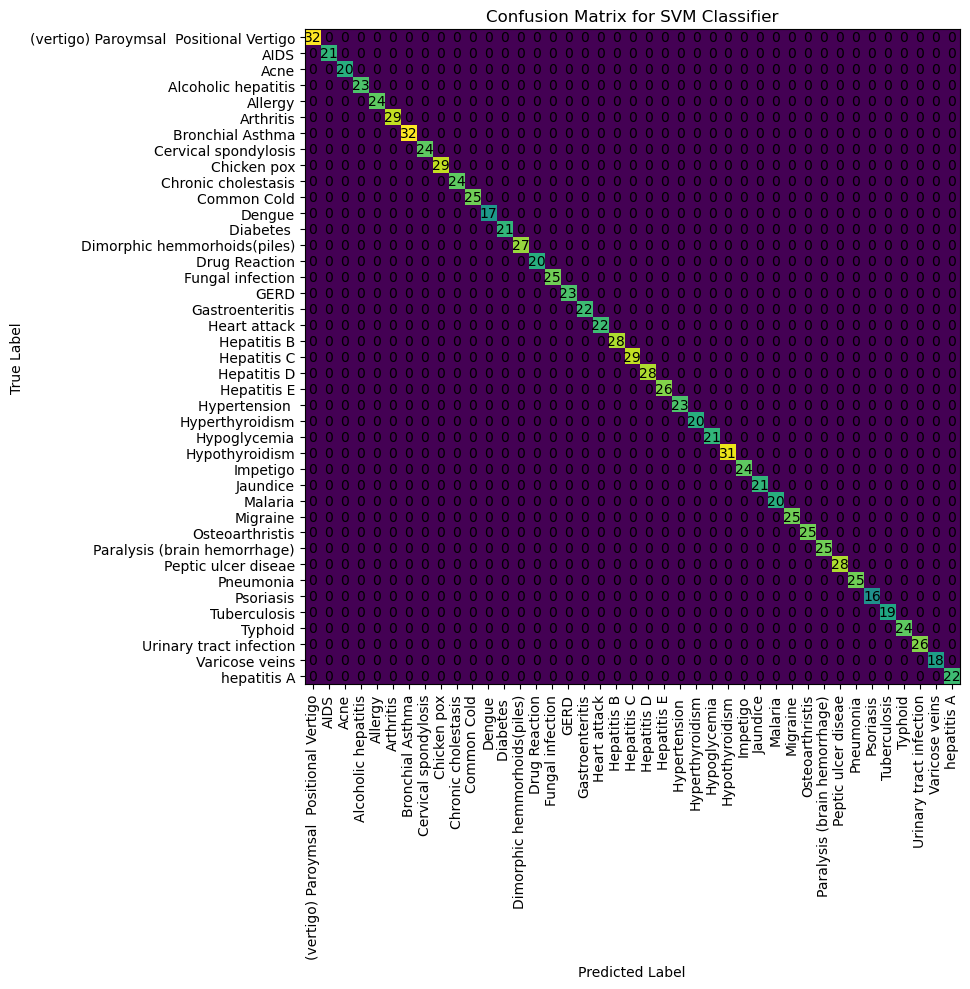

In [159]:
#SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds_svm = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds_svm)*100}")

cf_matrix_svm = confusion_matrix(y_test, preds_svm)
plt.figure(figsize=(12,10))

plt.subplot(1, 1, 1)
plt.imshow(cf_matrix_svm)
plt.title('Confusion Matrix for SVM Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(len(encoder.classes_)), encoder.classes_, rotation=90)
plt.yticks(np.arange(len(encoder.classes_)), encoder.classes_)
for i in range(len(encoder.classes_)):
    for j in range(len(encoder.classes_)):
        plt.text(j, i, str(cf_matrix_svm[i, j]), ha='center', va='center')

plt.tight_layout()

def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    return precision, recall, f1_score


svm_precision, svm_recall, svm_f1 = calculate_metrics(y_test, preds_svm)

print("SVM Model Metrics:")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1}")
print()

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0
Naive Bayes Model Metrics:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0



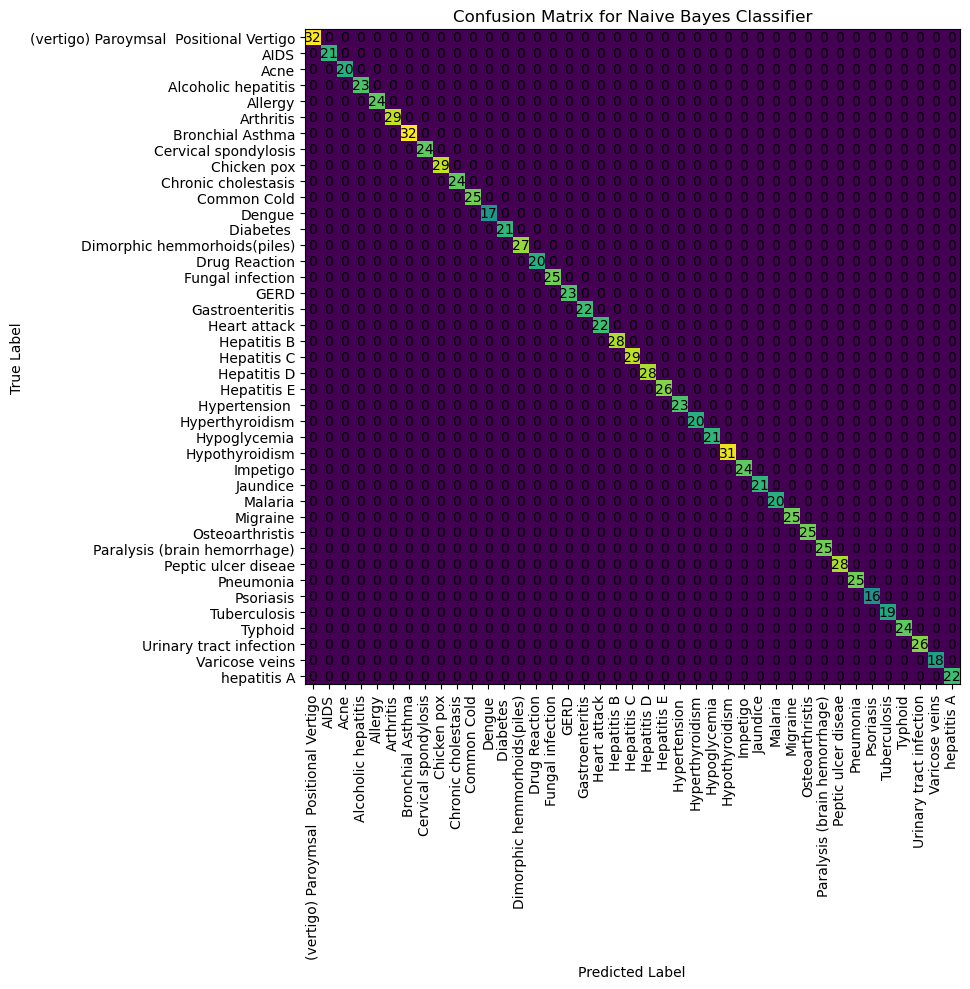

In [160]:
#Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, nb_preds)*100}")

cf_matrix_nb = confusion_matrix(y_test, nb_preds)
plt.figure(figsize=(12,10))
plt.subplot(1, 1, 1)
plt.imshow(cf_matrix_nb)
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(len(encoder.classes_)), encoder.classes_, rotation=90)
plt.yticks(np.arange(len(encoder.classes_)), encoder.classes_)
for i in range(len(encoder.classes_)):
    for j in range(len(encoder.classes_)):
        plt.text(j, i, str(cf_matrix_svm[i, j]), ha='center', va='center')
plt.tight_layout()

nb_precision, nb_recall, nb_f1_score = calculate_metrics(y_test, nb_preds)
print("Naive Bayes Model Metrics:")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"F1 Score: {nb_f1_score}")
print()

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0
Random Forest Model Metrics:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


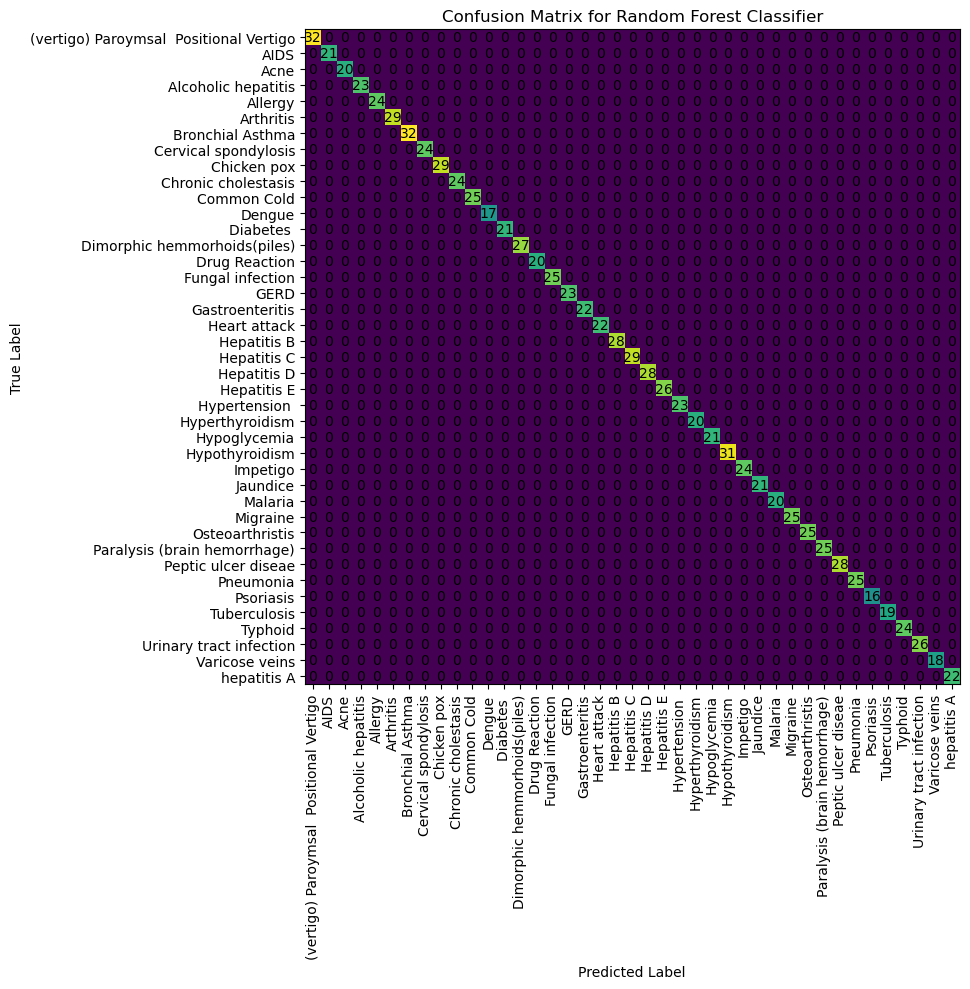

In [161]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, rf_preds)*100}")

cf_matrix_rf = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(12,10))
plt.subplot(1, 1, 1)
plt.imshow(cf_matrix_rf)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(len(encoder.classes_)), encoder.classes_, rotation=90)
plt.yticks(np.arange(len(encoder.classes_)), encoder.classes_)
for i in range(len(encoder.classes_)):
    for j in range(len(encoder.classes_)):
        plt.text(j, i, str(cf_matrix_svm[i, j]), ha='center', va='center')
plt.tight_layout()

rf_precision, rf_recall, rf_f1_score = calculate_metrics(y_test, rf_preds)
print("Random Forest Model Metrics:")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1_score}")

In [162]:

test_data = pd.read_csv("C:/Users/saeed/OneDrive/Desktop/ads/AIES/Testing.csv", encoding='latin1').dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

final_preds = [mode([i,j,k])[0][0] for i,j,
			k in zip(preds_svm, nb_preds, rf_preds)]


In [163]:
symptoms = X.columns.values


symptom_index = {}
for index, value in enumerate(symptoms):
	symptom = " ".join([i.lower() for i in value.split("_")])
	symptom_index[symptom] = index

data_dict = {
	"symptom_index":symptom_index,
	"predictions_classes":encoder.classes_
}

def predictDisease(symptoms):
	symptoms = symptoms.split(",")
	
	input_data = [0] * len(data_dict["symptom_index"])
	for symptom in symptoms:
		index = data_dict["symptom_index"][symptom]
		input_data[index] = 1
		
	input_data = np.array(input_data).reshape(1,-1)
	
	rf_prediction = data_dict["predictions_classes"][rf_model.predict(input_data)[0]]
	nb_prediction = data_dict["predictions_classes"][nb_model.predict(input_data)[0]]
	svm_prediction = data_dict["predictions_classes"][svm_model.predict(input_data)[0]]
	
	final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
	predictions = {
		"rf_model_prediction": rf_prediction ,
		"naive_bayes_prediction": nb_prediction,
		"svm_model_prediction": svm_prediction,
		"final_prediction":final_prediction
	}
	result = ""
	for key, value in predictions.items():
		result += f"{key}: {value}\n"
	return result
symptoms_input = "itching,skin rash,stomach pain,burning micturition"
print(predictDisease(symptoms_input))


rf_model_prediction: Drug Reaction
naive_bayes_prediction: Drug Reaction
svm_model_prediction: Drug Reaction
final_prediction: Drug Reaction



In [164]:

doc_vs_disease = pd.read_csv('C:/Users/saeed/OneDrive/Desktop/ads/AIES/docVSdisease.csv')
doctor_specialist = pd.read_csv('C:/Users/saeed/OneDrive/Desktop/ads/AIES/Doctor_Specialist.csv')

doc_vs_disease['prognosis'] = doc_vs_disease['prognosis'].str.lower().str.strip()
doctor_specialist['name'] = doctor_specialist['name'].str.replace('.\xa0', ' ')

merged_data = pd.merge(doc_vs_disease, doctor_specialist, on='specialist')
merged_data['combined'] = merged_data['prognosis'] + ' ' + merged_data['name']

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(merged_data['combined'])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [165]:
def get_recommendations(prognosis):
    prognosis_lower = prognosis.lower().strip()
    
    matching_rows = merged_data[merged_data['prognosis'].str.lower().str.strip() == prognosis_lower]
    
    if matching_rows.empty:
        print(f"Prognosis '{prognosis}' not found in the dataset.")
        return pd.DataFrame()

    index = matching_rows.index[0]
    sim_scores = list(enumerate(cosine_sim[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  

    doctor_indices = [i[0] for i in sim_scores]
    recommendations = merged_data.iloc[doctor_indices][['name', 'specialist', 'experience', 'location', 'average Fee']]
    
    return recommendations

recommendations_diabetes = get_recommendations('drug reaction')
print(recommendations_diabetes)


                     name specialist  experience      location average Fee
25  Dr Himanshi Chaudhary  Allergist   8 years      Sangamvadi     ₹ 1,200
32        Dr Khushi kumar  Allergist  10 years         Kothrud       ₹ 800
33       Dr Shristi Pawar  Allergist  15 years         Kondhwa       ₹ 900
31      Dr Himanshu Bapat  Allergist  37 years    Prabhat Road       ₹ 700
34       Dr Shruti Shinde  Allergist  20 years          Pimpri     ₹ 1,000
